In [1]:
#Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
# General idea about dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
#Checking for nullValues in the dataframe
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
payment_filtered = df[df['type'] == 'PAYMENT']
payment_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [7]:
payment_filtered.describe()
#No frauds if the type is PAYMENT

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


In [8]:
Transfer_Filter = df[df['type'] == 'TRANSFER']
Transfer_Filter.describe()
#Potential frauds been detected only in TRANSFER AND CASH_IN

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,532909.000000,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,532909.000000,532909.000000
mean,246.657304,9.106470e+05,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.000030
std,145.015876,1.879574e+06,4.399818e+05,2.623603e+05,6.037846e+06,7.387614e+06,0.087344,0.005479
min,1.000000,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,2.159054e+05,0.000000e+00,0.000000e+00,2.249354e+05,7.536934e+05,0.000000,0.000000
50%,250.000000,4.863084e+05,0.000000e+00,0.000000e+00,1.015903e+06,1.725375e+06,0.000000,0.000000
75%,346.000000,9.749580e+05,2.626600e+04,0.000000e+00,2.753798e+06,3.795986e+06,0.000000,0.000000
max,743.000000,9.244552e+07,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08,1.000000,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df.head()

# 1 - CASH_OUT 2 - DEBIT 3 - PAYMENT 4 - TRANSFER

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.714150e+00
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.350117e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,3.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,4.000000e+00


In [11]:
df['nameDest'].nunique()

2722362

In [12]:
df['isFlaggedFraud'].sum()

16

In [13]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_encoded        int32
dtype: object


In [14]:
x = df.sort_values(by=["type"])[['type']]
x.head()
wordsx,countx = np.unique(x.values,return_counts=True)

In [15]:
print(wordsx,'\n',countx)

['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER'] 
 [1399284 2237500   41432 2151495  532909]


In [16]:
#Checking all types 

CASH_IN_total = countx[0]/countx.sum() *100
CASH_OUT_total = countx[1]/countx.sum() *100
DEBIT_total = countx[2]/countx.sum() *100
PAYMENT_total = countx[3]/countx.sum() *100
TRANSFER_total = countx[4]/countx.sum() *100

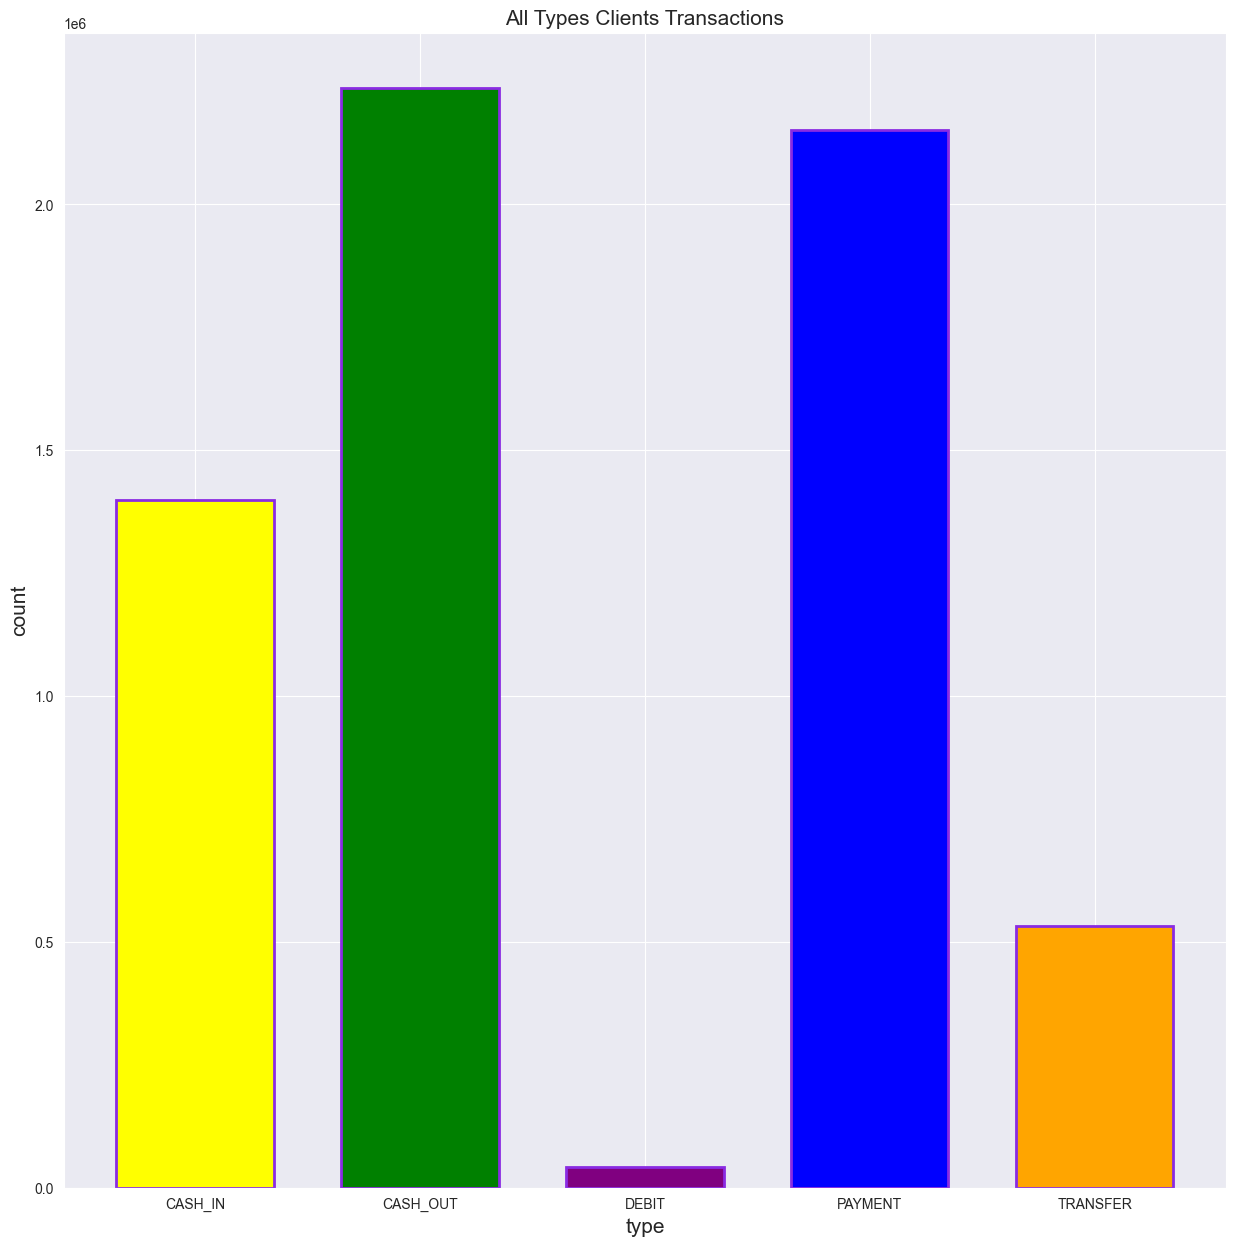

In [17]:
#Plotting to check ratios


plt.figure(figsize=[15, 15])
plt.bar(wordsx, countx, width=0.7, edgecolor='blueviolet',
        color=['yellow','green','purple','blue','orange'], linewidth=2)
plt.title('All Types Clients Transactions', fontsize=15)
plt.xlabel('type', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()



In [18]:
fraud_counts = df.groupby('type')['isFraud'].sum()
fraud_counts

#We can see that frauds are limited to only two types, cashout and transfer.

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

<Axes: ylabel='isFraud'>

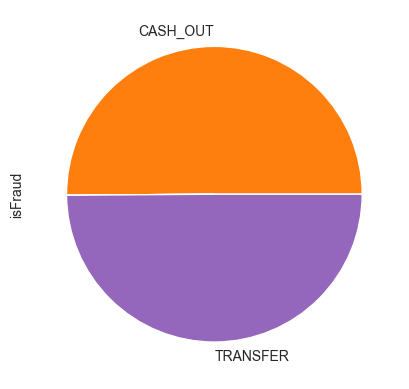

In [19]:
fraud_counts.plot(kind='pie')

type
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


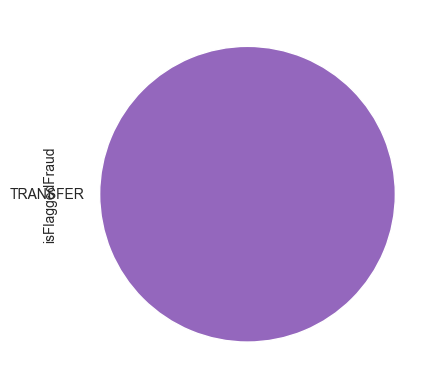

In [20]:
fraud_flag_counts = df.groupby('type')['isFlaggedFraud'].sum()
fraud_flag_counts.plot(kind='pie')
print(fraud_flag_counts)

#Flagged only under TRANSFER type

In [21]:
corr = df.corr()
corr["isFraud"].sort_values(ascending=False)

ValueError: could not convert string to float: 'PAYMENT'

In [22]:
df['type'] = df['type'].map({"CASH_OUT":1,
                             "PAYMENT":2,
                             "CASH_IN":3,
                             "TRANSFER":4,
                             "DEBIT":5
                             })


df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [23]:
data1=df[(df['isFraud']==1) & (df['type']==4)]
nameDest_counts = data1['nameDest'].value_counts()
duplicates_nameDest = nameDest_counts[nameDest_counts > 1]
print(len(duplicates_nameDest))

0


In [24]:
data1[['nameOrig','nameDest','oldbalanceDest','newbalanceDest']]

,nameOrig,nameDest,oldbalanceDest,newbalanceDest
2,C1305486145,C553264065,0.0,0.0
251,C1420196421,C972765878,0.0,0.0
680,C137533655,C1848415041,0.0,0.0
969,C1334405552,C431687661,0.0,0.0
1115,C1364127192,C1136419747,0.0,0.0
...,...,...,...,...
6362610,C778071008,C1812552860,0.0,0.0
6362612,C1531301470,C1470998563,0.0,0.0
6362614,C2013999242,C1850423904,0.0,0.0
6362616,C1529008245,C1881841831,0.0,0.0


In [25]:
# Check if any 'nameDest' values start with 'M'
mask1 = data1['nameDest'].str.startswith('M')
mask2 = data1['nameOrig'].str.startswith('M')
# Display rows where 'nameDest' starts with 'M'
result1 = data1[mask1]
result2 = data1[mask2]

# Check if any such rows exist
if not result1.empty:
    print("There are 'nameDest' values that start with 'M'.")
    print(result1)
else:
    print("There are no 'nameDest' values that start with 'M'.")

if not result2.empty:
    print("There are 'nameOrig' values that start with 'M'.")
    print(result2)
else:
    print("There are no 'nameOrig' values that start with 'M'.")

There are no 'nameDest' values that start with 'M'.
There are no 'nameOrig' values that start with 'M'.


In [ ]:
# The above code shows that the transfers that have been happening are just done over C to C and has no Merchant accounts involved

In [26]:
data2=df[(df['isFraud']==1) & (df['type']==1)]

# Count the occurrences of each value in 'nameOrig'
nameOrig_counts = data2['nameOrig'].value_counts()
print(nameOrig_counts)

# Filter for values greater than 1
duplicates = nameOrig_counts[nameOrig_counts > 1]
print(len(duplicates))

nameOrig
C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: count, Length: 4116, dtype: int64
0



 No duplicates found in NameDest and NameOrgin implying a specific account is not used to carry out fraudulent transaction

In [55]:
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [29]:
fraudTransfer = fraud[fraud['type'] == 4]
fraudCashout = fraud[fraud['type'] == 1]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraudTransfer.nameDest.isin(fraudCashout.nameOrig).any()

#False as for fraudulent transactions, the account recieving funds during transfer was not used for cashout.

False

In [31]:
print(fraudTransfer)

         step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2           1     4      181.00  C1305486145         181.00             0.0   
251         1     4     2806.00  C1420196421        2806.00             0.0   
680         1     4    20128.00   C137533655       20128.00             0.0   
969         1     4  1277212.77  C1334405552     1277212.77             0.0   
1115        1     4    35063.63  C1364127192       35063.63             0.0   
...       ...   ...         ...          ...            ...             ...   
6362610   742     4    63416.99   C778071008       63416.99             0.0   
6362612   743     4  1258818.82  C1531301470     1258818.82             0.0   
6362614   743     4   339682.13  C2013999242      339682.13             0.0   
6362616   743     4  6311409.28  C1529008245     6311409.28             0.0   
6362618   743     4   850002.52  C1685995037      850002.52             0.0   

            nameDest  oldbalanceDest  newbalanceDes

In [30]:
#Checking for balances before and after transaction

wrong_OrigBal = sum(df['oldbalanceOrg'] - df['amount'] != df['newbalanceOrig'])
wrong_DestBal = sum(df['newbalanceDest'] + df['amount'] != df['newbalanceDest'])

print(wrong_OrigBal)
print(wrong_DestBal)
print("Percentage of obs with balance errors outgoing:   ", 100 * round(wrong_OrigBal/len(df),2)) 
print("Percentage of obs with balance errors incoming:   ",100 *  round(wrong_DestBal/len(df),3)) 

## Almost all the incoming and outoging balances have errors, and we have no idea as of what is causing these errors,
# Hence we cant use this information for our model.

5413997
6362604
Percentage of obs with balance errors outgoing:    85.0
Percentage of obs with balance errors incoming:    100.0


In [33]:
df_new = df.copy()

In [34]:
# we can see that there are only 16 instances of 1's in flagged for fraud in a big data set, and also we dont need nameOrgi and nameDest in our
# model building process, so we drop these 3 columns which are of no help
df_new = df_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],axis=1)

In [35]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,2,9839.64,170136.00,160296.36,0.00,0.00,0,3
1,1,2,1864.28,21249.00,19384.72,0.00,0.00,0,3
2,1,4,181.00,181.00,0.00,0.00,0.00,1,4
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,1
4,1,2,11668.14,41554.00,29885.86,0.00,0.00,0,3
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,4
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,4


In [ ]:
#Money moving out is the risky one, as we can see its transaction and CASHout are the ones that are fraudulent transactions

In [48]:
fraud = fraud.sort_values(by='newbalanceDest',ascending = False)
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
6118269,533,1,495977.84,C813165216,495977.84,0.0,C65111466,2.362305e+08,2.367265e+08,1,0,1
6013665,449,1,133632.24,C782460784,133632.24,0.0,C260277833,7.183683e+07,7.197046e+07,1,0,1
6282441,656,1,766257.55,C38948739,766257.55,0.0,C533828275,4.614176e+07,4.690801e+07,1,0,1
6351127,698,1,748726.81,C714886527,748726.81,0.0,C522001237,3.629263e+07,3.704135e+07,1,0,1
695415,36,1,1684039.12,C168686866,1684039.12,0.0,C803116137,3.296166e+07,3.464570e+07,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6262277,611,4,1418168.85,C1778688025,1418168.85,0.0,C343288009,0.000000e+00,0.000000e+00,1,0,4
6308243,685,4,73110.82,C1808244239,73110.82,0.0,C1237294806,0.000000e+00,0.000000e+00,1,0,4
6010845,443,4,1795622.71,C699874957,1795622.71,0.0,C2123434459,0.000000e+00,0.000000e+00,1,0,4
1487413,142,4,73064.41,C627366177,73064.41,0.0,C1014517365,0.000000e+00,0.000000e+00,1,0,4


In [92]:
fraud.describe()
df = df.drop(["isFlaggedFraud",'nameOrig','nameDest'],axis =1)

In [93]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop("isFraud",axis =1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
len(X)

6362620

In [114]:
corr = X.corr()


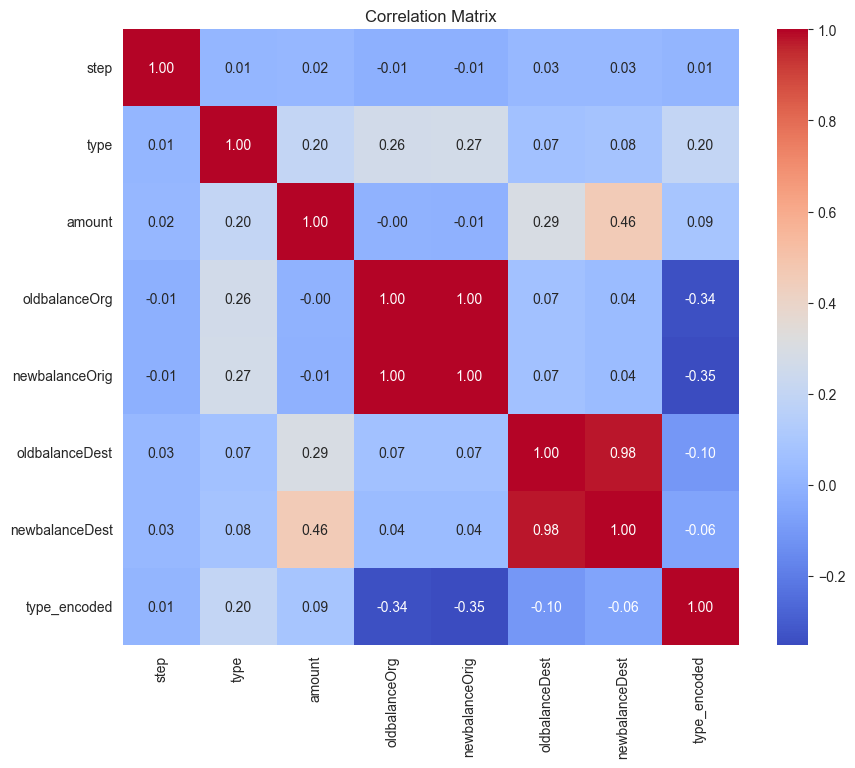

In [115]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [94]:
len(fraud)/len(df) * 100

# We are working with 0.12percent of the data to find anomalies in our dataset

0.12908204481801522

In [97]:
len(X_train)
len(X_test)

1590655

In [70]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [105]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [106]:
len(X_res)

36570

In [100]:
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [108]:
from sklearn.metrics import confusion_matrix, average_precision_score

clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9939408608403456
Confusion Matrix:
 [[1580364    8173]
 [   1465     653]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588537
           1       0.07      0.31      0.12      2118

    accuracy                           0.99   1590655
   macro avg       0.54      0.65      0.56   1590655
weighted avg       1.00      0.99      1.00   1590655

Confusion Matrix Train:
 [[4741712   24158]
 [   4131    1964]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   4765870
           1       0.08      0.32      0.12      6095

    accuracy                           0.99   4771965
   macro avg       0.54      0.66      0.56   4771965
weighted avg       1.00      0.99      1.00   4771965

Precision: 0.07398595060049852
Recall: 0.3083097261567517
F1: 0.11933479532163743
Area under precision (AUC) Recall: 0.023731592409478194


Naive Bias Classifier

In [117]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_NB = confusion_matrix(y_test,y_pred)
CR_NB = classification_report(y_test,y_pred)
CM_NBtrain = confusion_matrix(y_train,y_predtrain)
CR_NBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_NB)
print("Classification Report:\n",CR_NB)
print("Confusion Matrix Train:\n",CM_NBtrain)
print("Classification Report Train:\n",CR_NBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9067981429033951
Confusion Matrix:
 [[1441082  147455]
 [    797    1321]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95   1588537
           1       0.01      0.62      0.02      2118

    accuracy                           0.91   1590655
   macro avg       0.50      0.77      0.48   1590655
weighted avg       1.00      0.91      0.95   1590655

Confusion Matrix Train:
 [[4322868  443002]
 [   2251    3844]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95   4765870
           1       0.01      0.63      0.02      6095

    accuracy                           0.91   4771965
   macro avg       0.50      0.77      0.48   4771965
weighted avg       1.00      0.91      0.95   4771965

Precision: 0.00887912028821853
Recall: 0.6237016052880076
F1: 0.017508979813644014
Area under precision (AUC) Recall: 0.006038973030953667


Stocastic Grad Classifier

In [109]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_res, y_res)
y_pred=clf.predict(X_test)
y_predtrain=clf.predict(X_train)
SGDClassifier(max_iter=5)
CM_svc = confusion_matrix(y_test,y_pred)
CR_svc = classification_report(y_test,y_pred)
CM_svctrain = confusion_matrix(y_train,y_predtrain)
CR_svctrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_svc)
print("Classification Report:\n",CR_svc)
print("Confusion Matrix Train:\n",CM_svctrain)
print("Classification Report Train:\n",CR_svctrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9980265991053999
Confusion Matrix:
 [[1587109    1428]
 [   1711     407]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588537
           1       0.22      0.19      0.21      2118

    accuracy                           1.00   1590655
   macro avg       0.61      0.60      0.60   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train:
 [[4761683    4187]
 [   4956    1139]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765870
           1       0.21      0.19      0.20      6095

    accuracy                           1.00   4771965
   macro avg       0.61      0.59      0.60   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.2217983651226158
Recall: 0.19216241737488196
F1: 0.20591955476853022
Area under precision (AUC) Recall: 0.043696967523915504


Random Forest Classfier

In [110]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)


RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9996655465830114
Confusion Matrix:
 [[1588504      33]
 [    499    1619]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588537
           1       0.98      0.76      0.86      2118

    accuracy                           1.00   1590655
   macro avg       0.99      0.88      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4765865       5]
 [    123    5972]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765870
           1       1.00      0.98      0.99      6095

    accuracy                           1.00   4771965
   macro avg       1.00      0.99      0.99   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.9800242130750605
Recall: 0.7644003777148253
F1: 0.8588859416445622
Area under precision (AUC) Recall: 0.74944458589063

When using entire training data for training RandomForest model the model classifies only a very small fraction as Fraud but misclassifies more than 20% Fraud transactions as non-Fraud which is not desirable. Hence we train our RandomForest Classifier using undersampled training data to minimize misclassification of Fraud transactions allowing misclassification of non-Fraud transactions to some extent.

In [111]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,n_jobs=-1)


RF.fit(X_res, y_res)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9952296381050574
Confusion Matrix:
 [[1581013    7524]
 [     64    2054]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588537
           1       0.21      0.97      0.35      2118

    accuracy                           1.00   1590655
   macro avg       0.61      0.98      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4743776   22094]
 [      4    6091]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765870
           1       0.22      1.00      0.36      6095

    accuracy                           1.00   4771965
   macro avg       0.61      1.00      0.68   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.21444978074754645
Recall: 0.9697828139754485
F1: 0.35123119015047877
Area under precision (AUC) Recall: 0.208009946827

Conf Matrix and Classification Report of Random Forest Clasfier model


In [112]:


print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)



Confusion Matrix:
 [[1581013    7524]
 [     64    2054]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588537
           1       0.21      0.97      0.35      2118

    accuracy                           1.00   1590655
   macro avg       0.61      0.98      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4743776   22094]
 [      4    6091]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765870
           1       0.22      1.00      0.36      6095

    accuracy                           1.00   4771965
   macro avg       0.61      1.00      0.68   4771965
weighted avg       1.00      1.00      1.00   4771965

